# **Titanic passengers survived Training Set**

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

## **Taking care of missing Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

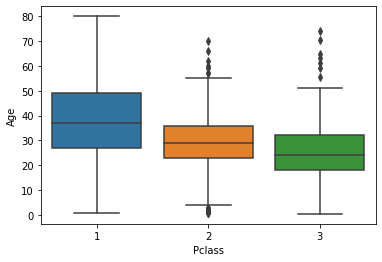

In [ ]:
sns.boxplot(x='Pclass',  y='Age',  data = data)

In [ ]:
# data age-mean
print(data[data['Pclass'] == 1] ['Age'].mean())
print(data[data['Pclass'] == 2] ['Age'].mean())
print(data[data['Pclass'] == 3] ['Age'].mean())  

38.233440860215055
29.87763005780347
25.14061971830986


In [ ]:
def fill_na_velue(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return round(data[data['Pclass'] == 1] ['Age'].mean())

    elif pclass == 2:
      return round(data[data['Pclass'] == 2] ['Age'].mean())
     
    elif pclass == 3:
      return round(data[data['Pclass'] == 3] ['Age'].mean())
      
  else:
    return age

data['Age'] =   data[['Age' , 'Pclass']].apply(fill_na_velue, axis=1 ) 


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

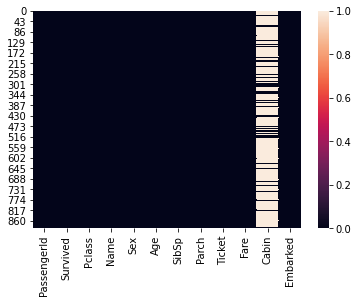

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.drop(['Cabin'], axis=1, inplace=True)


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.218414,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.178017,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


**Groupby matrix**

In [ ]:
#group by Survived

data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,29.787796,0.553734,0.329690,22.117887
1,444.358824,1.955882,28.299029,0.476471,0.467647,48.209498


In [ ]:
#group by Sex

data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,430.932692,0.740385,2.166667,27.685897,0.698718,0.653846,44.252124
male,454.147314,0.188908,2.389948,30.047088,0.429809,0.235702,25.523893


## **Correletion Matrix & Heatmap**

In [ ]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.032474,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193
Age,0.032474,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205
SibSp,-0.057686,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000


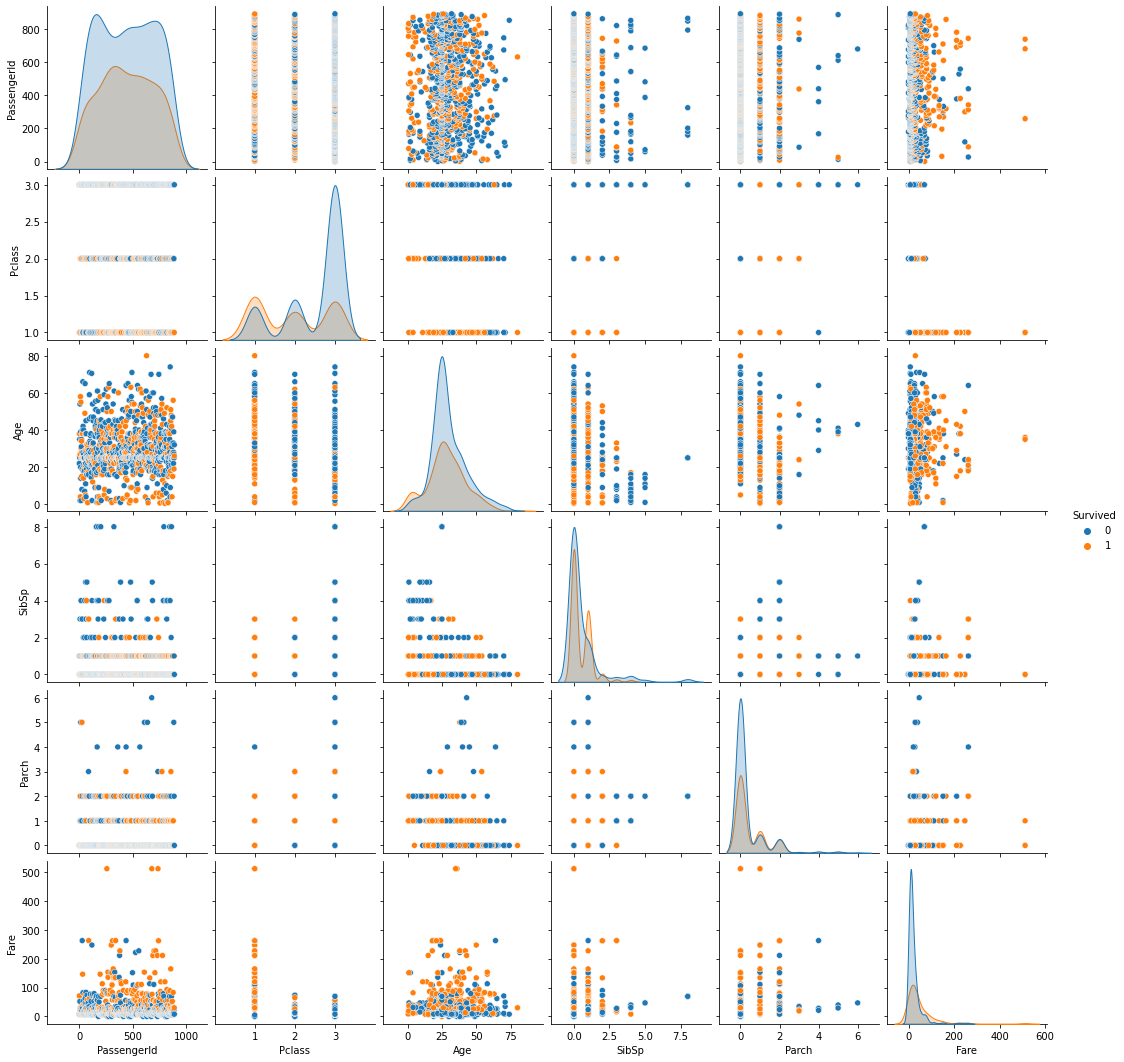

In [ ]:
sns.pairplot(data, hue = "Survived")

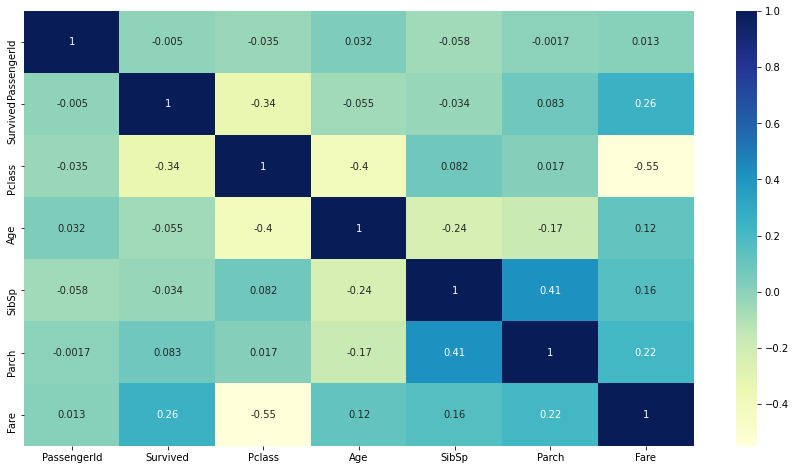

In [ ]:
#Heat Map

plt.subplots(figsize=(15,8))

sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

## **Variable reletion and visulizetion**

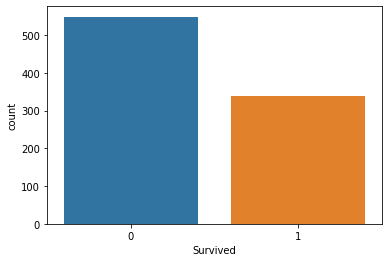

In [ ]:
sns.countplot(x = 'Survived', data = data )

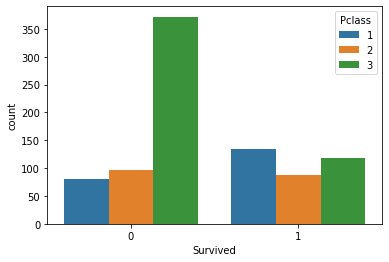

In [ ]:
sns.countplot(x = 'Survived', data = data, hue = 'Pclass' )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


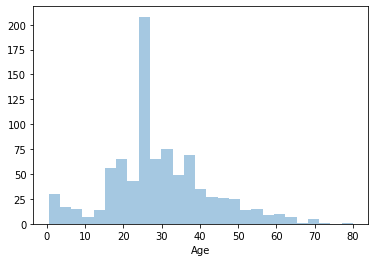

In [ ]:
sns.distplot(data['Age'], kde = False)

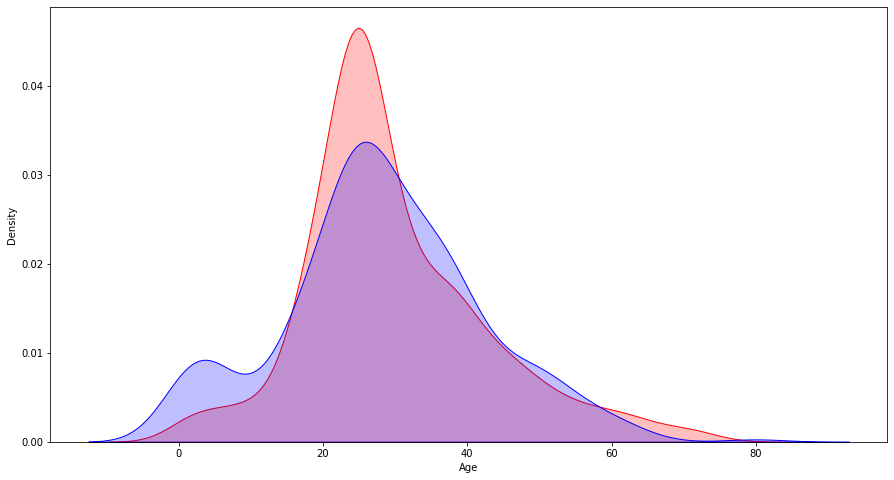

In [ ]:
#Age and Survived

plt.subplots(figsize = (15,8))

sns.kdeplot(data.loc[(data['Survived']==0),'Age'], color='r', shade=True, Label='Non Suevived')
sns.kdeplot(data.loc[(data['Survived']==1),'Age'], color='b', shade=True, Label='Suevived')

## **Encoding Catagorical Data**


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
data.drop([ 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
886,887,0,2,1,27.0,0,0,13.00,0,1
887,888,1,1,0,19.0,0,0,30.00,0,1
888,889,0,3,0,25.0,1,2,23.45,0,1
889,890,1,1,1,26.0,0,0,30.00,0,0
890,891,0,3,1,32.0,0,0,7.75,1,0


In [ ]:
data.shape

(889, 10)

## **Add Test Dataset**

In [ ]:
test_data = pd.read_csv('data.csv')

In [ ]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,1,0
1,893,3,0,47.0,1,0,7.0000,0,1
2,894,2,1,62.0,0,0,9.6875,1,0
3,895,3,1,27.0,0,0,8.6625,0,1
4,896,3,0,22.0,1,1,12.2875,0,1


In [ ]:
test_data.shape

(417, 9)

### **Concat The Data sets**

In [ ]:
final_data = pd.concat([data,test_data],axis=0)

In [ ]:
final_data.shape

(1306, 10)

In [ ]:
final_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,7.2500,0,1
1,2,1.0,1,0,38.0,1,0,71.2833,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,0,1
3,4,1.0,1,0,35.0,1,0,53.1000,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,0,1


In [ ]:
final_data.isnull().sum()

PassengerId      0
Survived       417
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked_Q       0
Embarked_S       0
dtype: int64

### **Spllite The Data Sets**

In [ ]:
data_Train = final_data.iloc[:889,:]
data_test = final_data.iloc[889: , :]

In [ ]:
data_test.drop('Survived', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_test.shape

(417, 9)

In [ ]:
data_Train.shape

(889, 10)

## **Feture Importence**

In [ ]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [ ]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,7.2500,0,1
1,2,1,0,38.0,1,0,71.2833,0,0
2,3,3,0,26.0,0,0,7.9250,0,1
3,4,1,0,35.0,1,0,53.1000,0,1
4,5,3,1,35.0,0,0,8.0500,0,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.1697522  0.10256079 0.27755828 0.17149413 0.04343036 0.03838928
 0.16574407 0.00935488 0.02171602]


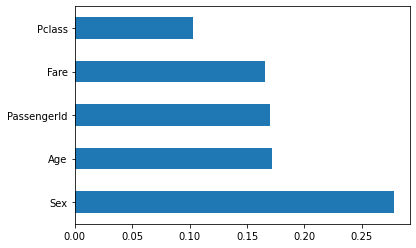

In [ ]:
feat_importances = pd.Series(model.feature_importances_ , index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

## **Accuracy**


###**Train_Test Spllite**

In [ ]:
X_train = data_Train.drop('Survived',axis=1)
y_train = data_Train['Survived']

### **Feture Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
data_test = sc.transform(data_test)

###**Algoridham**

In [ ]:
from xgboost import XGBClassifier
classifire = XGBClassifier()
classifire.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier.predict(data_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [85]:
pred = pd.DataFrame(y_pred)
data_sub = pd.read_csv("gender_submission.csv")
data_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [87]:
datasets = pd.concat([data_sub['PassengerId'],pred],axis=1)
datasets.columns = ['PassengerId', 'Survived']
datasets.to_csv('finalised_data.csv',index = False)
